<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-LH-1169213/blob/main/Visualizacion_Actividad_W6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal -- 6, visualización

## Laura Elena Hernández Mata

## A01169213

### Ciencia y analítica de datos (TC4029.10)

### Dra. María de la Paz Rico Fernández

1 noviembre 2022

# **1. El nombre del conjunto de datos. Y 3. El nombre de quien lo generó y su información general**

El conjunto de datos es obtenido del estudio **The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients** realizado por los autores Yeh y Len en 2009. 

**LOS DATOS SE OBTUVIERON DE: https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv**

**INFORMACIÓN GENERAL OBTENIDA DE LA LIGA: https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt**

*Data Set Information:*

*This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.*

*Citation Request:*

*Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.*


# **2. Describe el conjunto de datos**

El conjunto de datos cuenta con variables categóricas y numéricas. Igualmente, cuenta con una llave de cliente, la cual es única por línea de información. De acuerdo con los datos de la información de descarga, se puede conocer lo siguiente:

*Attribute Information:*

*This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:*
*X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.* 
*X2: Gender (1 = male; 2 = female).* 
*X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).* 
*X4: Marital status (1 = married; 2 = single; 3 = others).* 
*X5: Age (year).* 
*X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.* 
*X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.* 
*X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.* 

# **4. CÓDIGO**

In [ ]:
# IMPORTAMOS LIBRERÍAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib as mpl

## 1. Descarga los datos y carga el dataset en tu libreta.

In [ ]:
DatosOriginales = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv", sep = ",")

df = pd.DataFrame(DatosOriginales)

## 2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [ ]:
# OBTENEMOS INFORMACIÓN DEL DF

np.shape(df)

(30000, 25)

In [ ]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [ ]:
df.isna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna.

In [ ]:
# BÚSQUEDA DE NULOS

df.isnull().sum()

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

In [ ]:
# HACEMOS COPIA DE LA BD PARA BORRAR LOS NULOS

ndf = df.copy()

In [ ]:
# ELIMINAMOS LOS NULOS 

ndf.dropna(inplace = True)
print("¿Existen valores nulos en el data frame?", ndf.isna().values.any())
print("Número de registros eliminados que estaban vacíos:", len(df) - len(ndf))

¿Existen valores nulos en el data frame? False
Número de registros eliminados que estaban vacíos: 42


## 4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión.

In [ ]:
ndf.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


***En la tabla se puede apreciar la tendenecia central, la cual está determinada por la media o mean, por su nombre en inglés. Esta variable, que también se conoce como promedio, muestra cuáles son los valores medios de cada columna. Por otro lado, la dispersión está determinada por la desviación estándar, que aparece con las siglas std. Dicha desviación nos dice qué tanto se podría mover el intervalo de los datos respecto a la media. Por lo tanto, a mayor desviación estándar, quiere decir que los datos se encuentran con mayor dispersión. Mientras que si ésta es pequeña, nos indica que el intervalo de los datos se encuentra cercano a la media. Igualmente, los perdentiles de 25%, 50% y 75% nos indican si la dispersión está sesgada hacia la derecha o hacia la izquierda. Ya que si en el primer cuartil (25%) se encuentra un bajo nivel de datos, quiere decir que la dispersión de datos tiene mayor concentración hacia la izquierda de la curva normal. En este sentido, el 50% y 75% tendrían la mayor cantidad de datos.***

## 5. Realiza el conteo de las variables categóricas.

In [ ]:
var_categ = ["X2","X3","X4","X6","X7","X8","X9","X10","X11","Y"]
print("Conteo de variables categóricas:", ndf[var_categ].shape[1])

Conteo de variables categóricas: 10


## 6. Escala los datos, si consideras necesario

In [ ]:
# ELIMINAMOS LOS DATOS CATEGÓRICOS
ndf.drop(columns={"X2","X3","X4","X6","X7","X8","X9","X10","X11","Y","ID"}, inplace = True)
ndf.head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [ ]:
scaler = StandardScaler()
df_transformed = pd.DataFrame(scaler.fit_transform(ndf), columns=ndf.columns)

## 7. Reduce las dimensiones con PCA, si consideras necesario.


In [ ]:
pca = PCA()
pca.fit(df_transformed)
pcaSummary = pd.DataFrame({'Standard deviation': np.round(np.sqrt(pca.explained_variance_), 2),
                          'Proportion of variance': np.round(pca.explained_variance_ratio_ * 100, 2),
                          'Cumulative proportion': np.round(np.cumsum(pca.explained_variance_ratio_) * 100, 2) 
                          })

pcaSummary = pcaSummary.transpose()
pcaSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcaSummary.columns) + 1)]
pcaSummary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.43,1.31,1.02,0.96,0.94,0.93,0.88,0.85,0.84,0.51,0.27,0.20,0.16,0.15
Proportion of variance,42.28,12.26,7.46,6.61,6.31,6.23,5.57,5.19,5.05,1.89,0.51,0.29,0.18,0.17
Cumulative proportion,42.28,54.53,62.00,68.61,74.92,81.15,86.72,91.91,96.96,98.85,99.36,99.65,99.83,100.00


### 7.1 Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%


In [ ]:
pcsComponents_df = pd.DataFrame(pca.components_.transpose(), 
                                columns=pcaSummary.columns,
                                index=df_transformed.columns
                                )
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X1,0.165507,0.300709,-0.378575,-0.200103,0.035312,-0.078883,0.111239,-0.046381,-0.821996,-0.029201,-0.006198,0.015697,-0.000417,0.003345
X5,0.032789,0.071906,-0.869471,0.338990,-0.039760,0.071461,-0.078816,0.027368,0.330346,-0.009011,0.000139,-0.001377,0.000132,0.001067
X12,0.372446,-0.190793,-0.034207,-0.063899,0.041391,-0.043987,0.008169,0.009341,0.010348,0.566716,0.416018,-0.432992,-0.183793,-0.316576
X13,0.383253,-0.174644,-0.001814,0.007629,0.083164,-0.028824,-0.032444,-0.135636,0.016872,0.386872,0.038425,0.345052,0.329467,0.645227
X14,0.388264,-0.126883,0.034747,0.060528,0.113790,0.099239,-0.121162,0.093077,-0.018607,0.122863,-0.484776,0.495792,-0.086466,-0.527640
X15,0.391557,-0.120403,0.034073,0.074774,0.028378,0.014527,0.126494,0.039157,0.019109,-0.205260,-0.523211,-0.489647,-0.362078,0.346095
X16,0.388505,-0.105928,0.033882,0.039553,-0.106756,-0.099290,-0.007584,0.049781,0.023701,-0.419992,0.068372,-0.249500,0.718388,-0.226667
X17,0.380672,-0.094157,0.018489,-0.070616,-0.164986,0.069272,0.007892,-0.000282,0.058701,-0.488861,0.513313,0.338689,-0.427734,0.072287
X18,0.135120,0.383194,0.173845,0.362055,0.225652,0.040574,-0.201646,-0.748694,0.019949,-0.056581,0.047513,-0.069359,-0.044841,-0.084567
X19,0.116768,0.408391,0.200925,0.345745,0.148714,0.408361,-0.278835,0.578491,-0.110712,0.050854,0.147307,-0.068851,0.038925,0.124894


### 7.2 Indica la importancia de las variables en cada componente

In [ ]:
print("=============PC1=================")
print("** Más importante:")
print(pcsComponents_df.PC1.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC1.nsmallest(3))
print("=============PC2=================")
print("** Más importante:")
print(pcsComponents_df.PC2.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC2.nsmallest(3))
print("=============PC3=================")
print("** Más importante:")
print(pcsComponents_df.PC3.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC3.nsmallest(3))
print("=============PC4=================")
print("** Más importante:")
print(pcsComponents_df.PC4.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC4.nsmallest(3))
print("=============PC5=================")
print("** Más importante:")
print(pcsComponents_df.PC5.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC5.nsmallest(3))
print("=============PC6=================")
print("** Más importante:")
print(pcsComponents_df.PC6.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC6.nsmallest(3))
print("=============PC7=================")
print("** Más importante:")
print(pcsComponents_df.PC7.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC7.nsmallest(3))
print("=============PC8=================")
print("** Más importante:")
print(pcsComponents_df.PC8.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC8.nsmallest(3))

=============PC1=================
** Más importante:
X15    0.391557
X16    0.388505
X14    0.388264
Name: PC1, dtype: float64
** Menos importante:
X5     0.032789
X23    0.105481
X22    0.113741
Name: PC1, dtype: float64
=============PC2=================
** Más importante:
X19    0.408391
X20    0.392339
X18    0.383194
Name: PC2, dtype: float64
** Menos importante:
X12   -0.190793
X13   -0.174644
X14   -0.126883
Name: PC2, dtype: float64
=============PC3=================
** Más importante:
X19    0.200925
X18    0.173845
X20    0.122065
Name: PC3, dtype: float64
** Menos importante:
X5    -0.869471
X1    -0.378575
X22   -0.060900
Name: PC3, dtype: float64
=============PC4=================
** Más importante:
X18    0.362055
X19    0.345745
X5     0.338990
Name: PC4, dtype: float64
** Menos importante:
X22   -0.609833
X23   -0.365692
X1    -0.200103
Name: PC4, dtype: float64
=============PC5=================
** Más importante:
X23    0.659155
X18    0.225652
X19    0.148714
Name: PC5, 

## 8. Elabora los histogramas de los atributos para visualizar su distribución

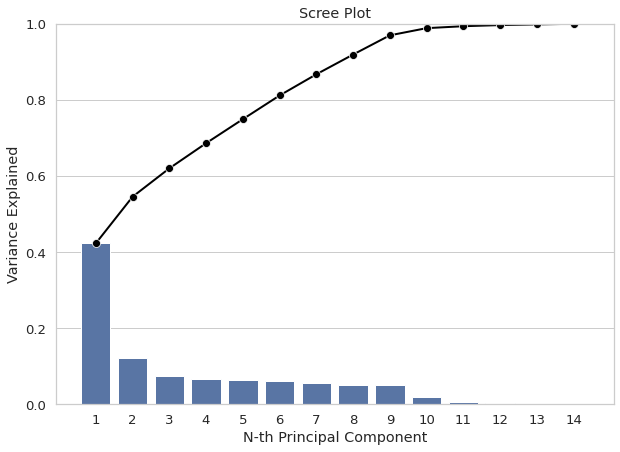

In [ ]:
PC_components = np.arange(pca.n_components_) + 1

scree = sns.set(style = 'whitegrid', font_scale = 1.2)

fig, ax = plt.subplots(figsize=(10, 7))

scree = sns.barplot(x = PC_components, y = pca.explained_variance_ratio_, color = 'b')

scree = sns.lineplot(x = PC_components-1, 
                     y = np.cumsum(pca.explained_variance_ratio_), 
                     color = 'black', 
                     linestyle = '-', 
                     linewidth = 2, 
                     marker = 'o', 
                     markersize = 8
                    )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

## 9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

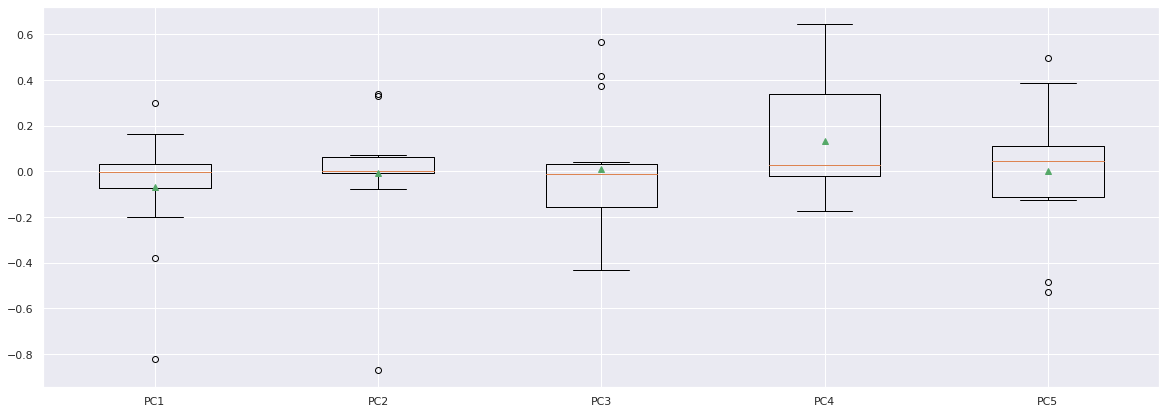

In [ ]:
sns.set(rc={'figure.figsize':(20,7)})

aux = pcsComponents_df.iloc[0:5]
plt.boxplot(aux, labels = pcsComponents_df.columns[0:5], showmeans=True)
plt.show()

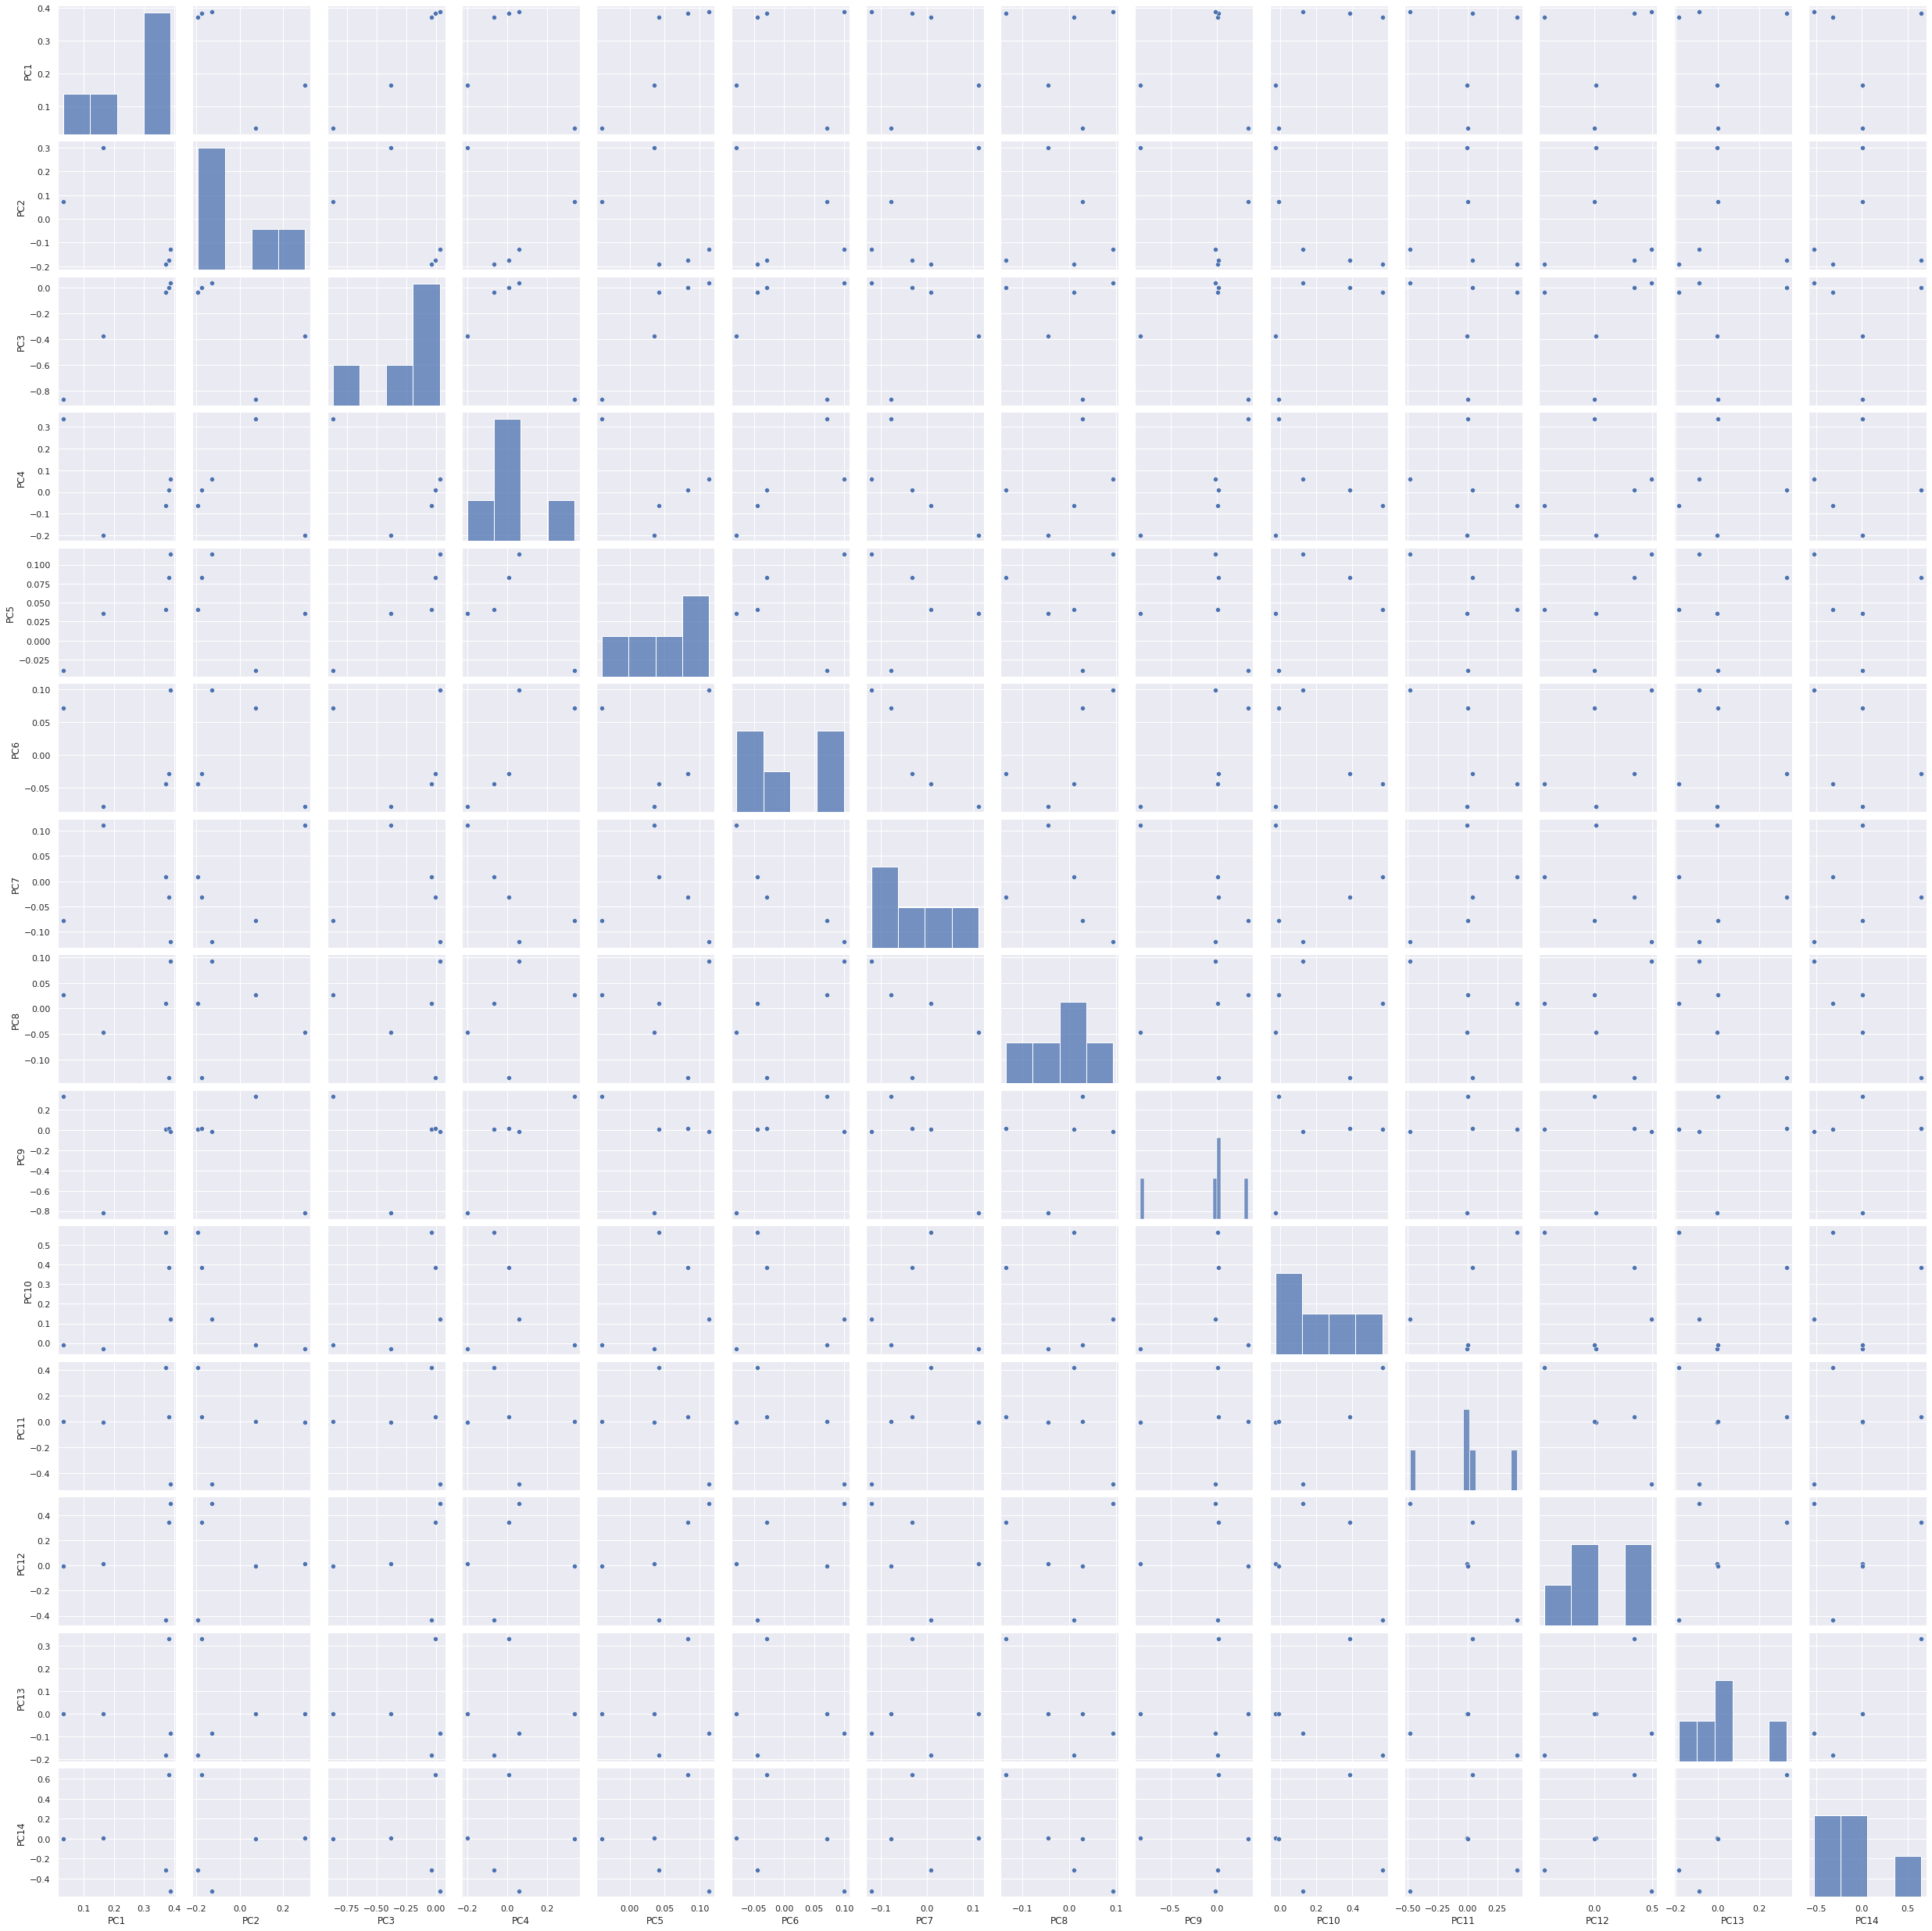

In [ ]:
sns.pairplot(pcsComponents_df.iloc[0:5])

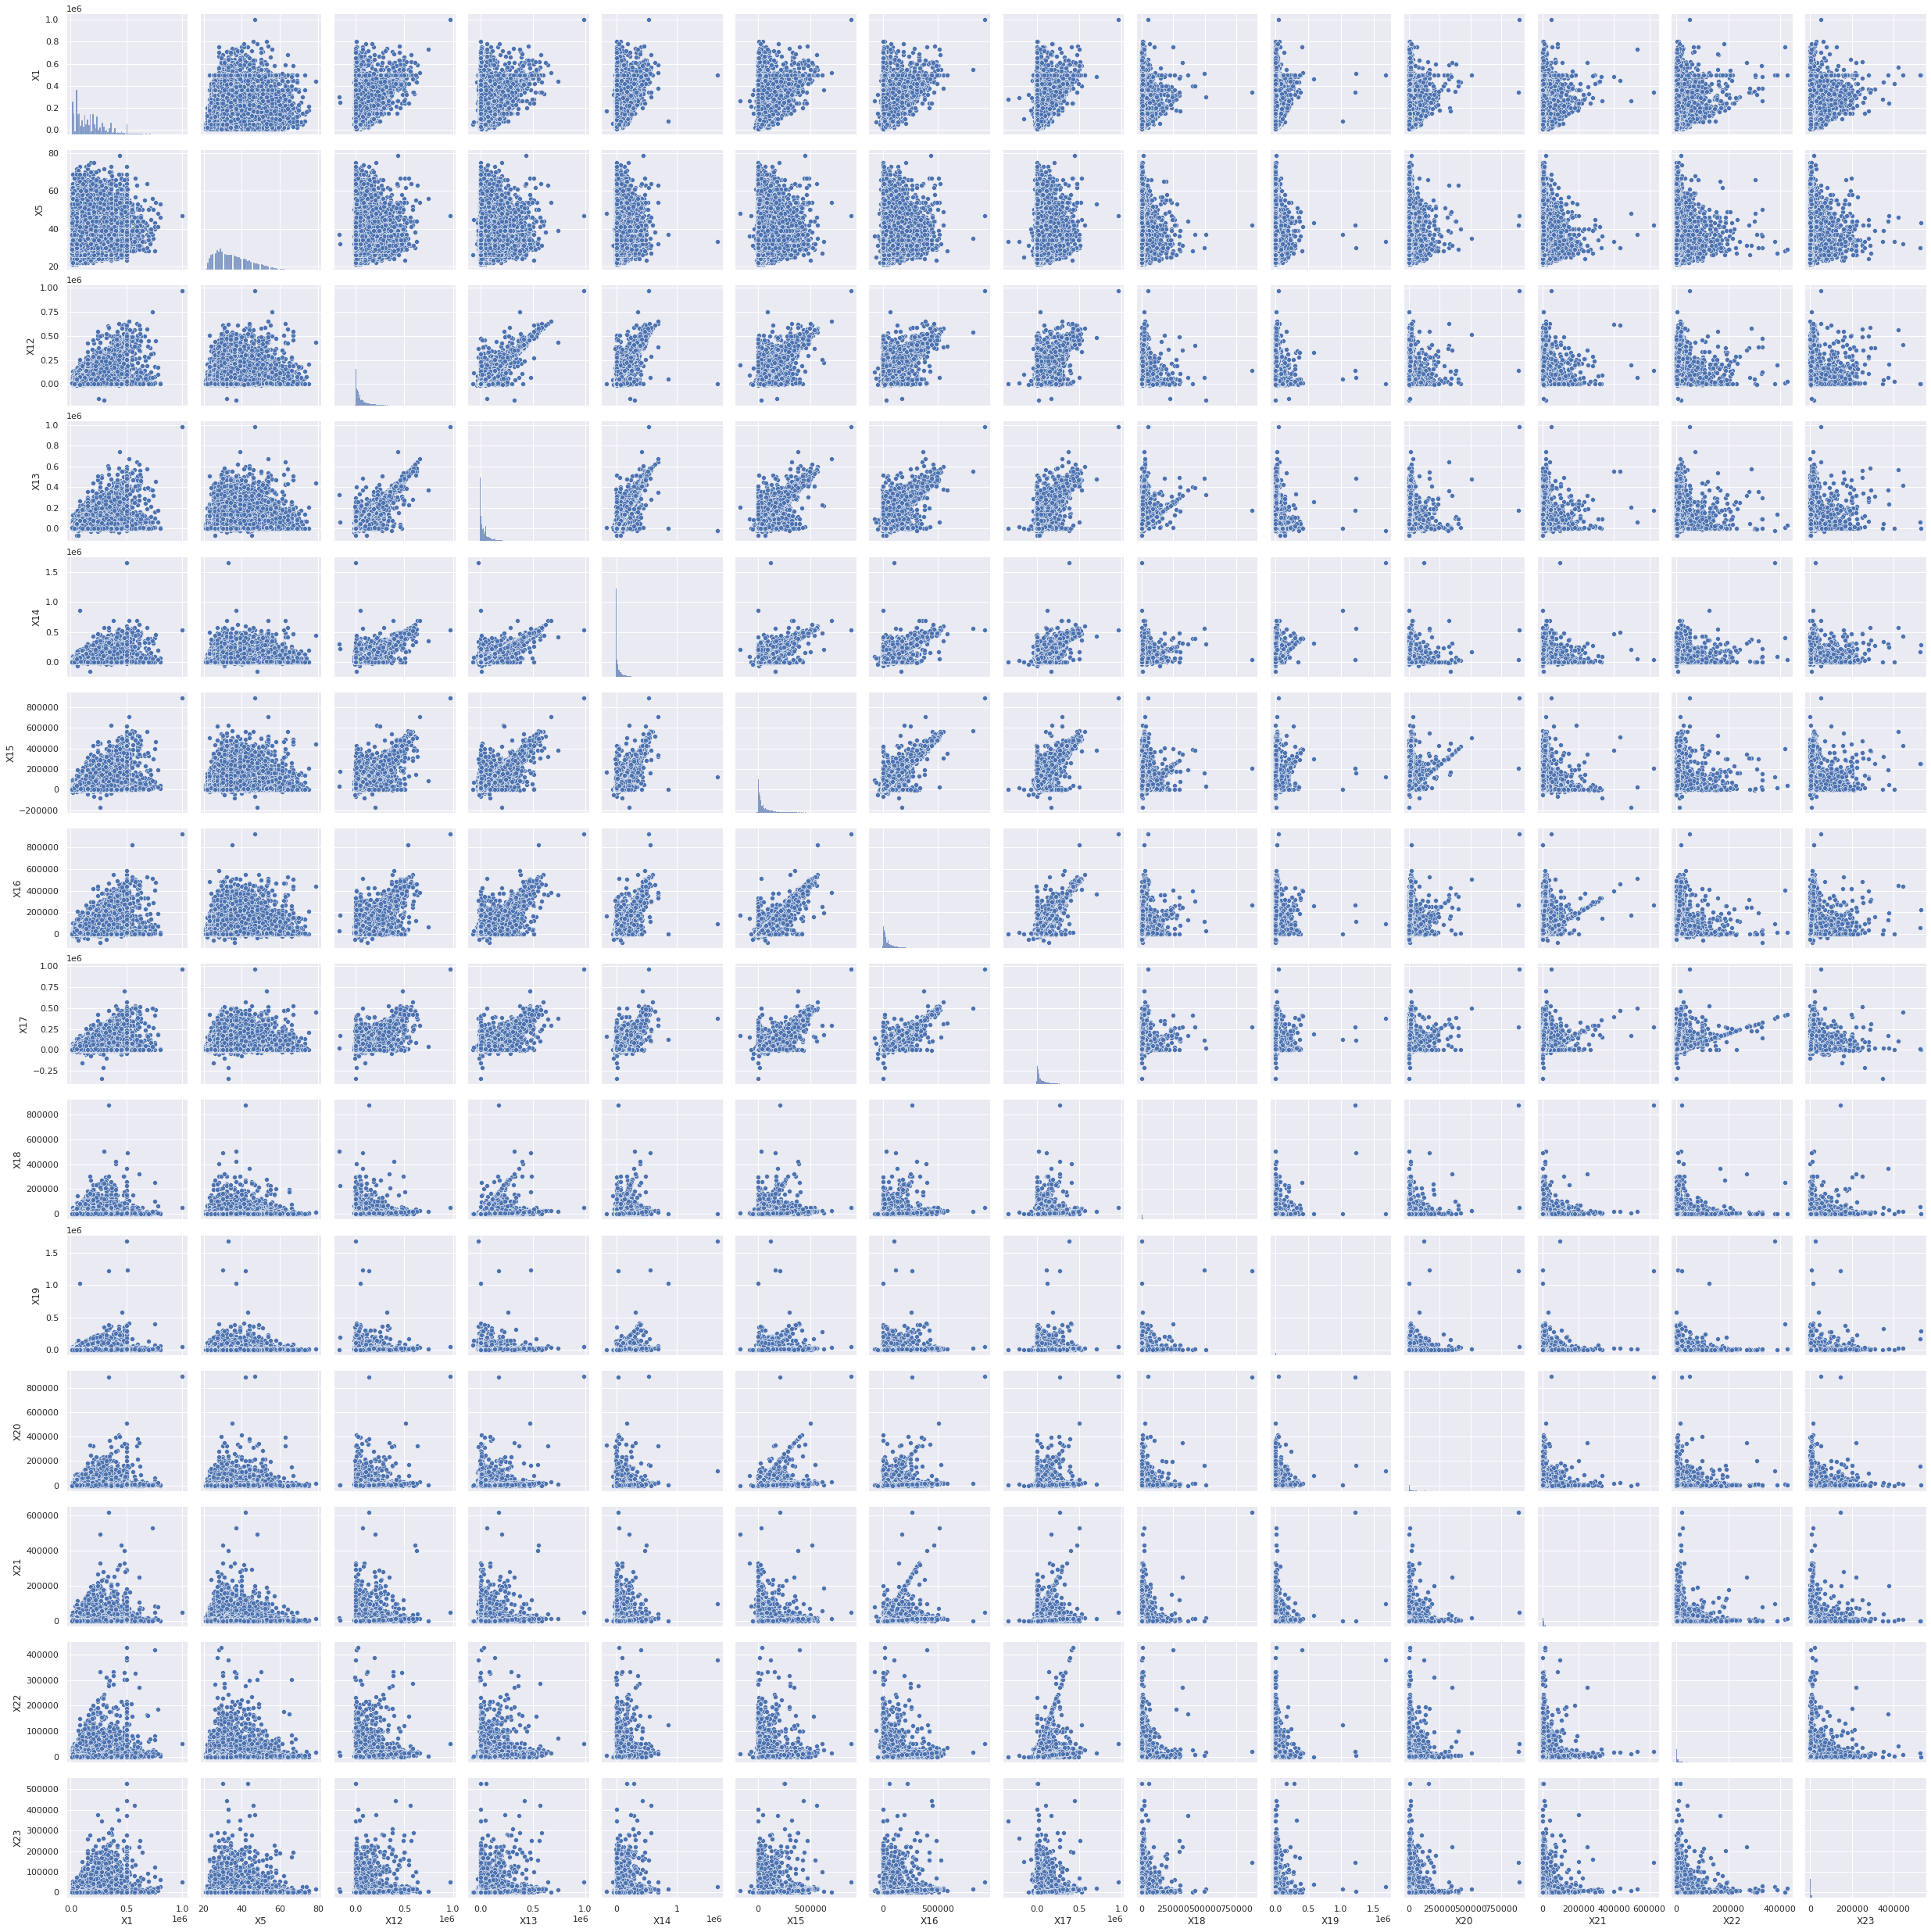

In [ ]:
sns.pairplot(ndf)

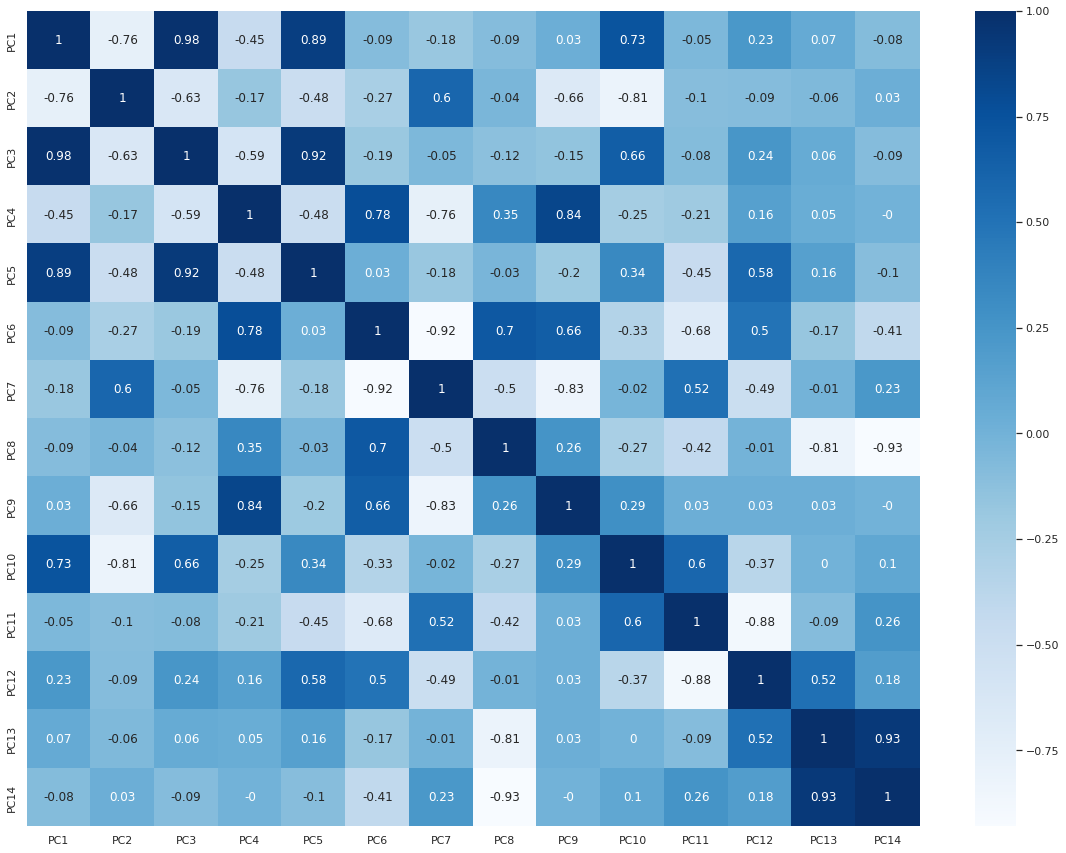

In [ ]:
sns.set(rc={'figure.figsize':(20,15)}) 
sns.heatmap(pcsComponents_df.iloc[0:5].corr().round(2), annot=True, cmap="Blues") 
plt.show()

## 10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

***De acuerdo con lo que hemos estudiado en la asignatura y a lo largo de la maestría, decidí incluir las tres gráficas mostradas previamente, en las cuales hago un enfoque a los primeros 5 componentes, los cuales en conjunto cuentan con poco más del 70% de lo solicitado en el ejercicio 7. En primer lugar, realicé un boxplot donde se muestra la distribución en cada componente. Gracias a esa gráfica, puedo observar que todas las cajas tienen desventajas en cuanto a sesgo positivo y negativo. En el caso del Pair plot, me interesó entender la diferencia entre el comportamiento de las variables vs los componentes, en este sentido, en la segunda gráfica se puede apreciar la relación con respecto a 5 componentes principales, mientras que en la tercera gráfica, se puede apreciar la relación por variable. Pienso que esto es una relación interesante entre variables y componentes. Para el tercer ejemplo de gráficas, decidí realizar una matriz de correlación para entender la relación entre los cinco componentes principales y el resto del análisis. Pienso que estas gráficas complementan la que realicé en el ejercicio 7, donde también se aprecia la varianza explicada y cuánto aporta cada componente.***

# 5. CONCLUSIÓN

***Finalmente, esta práctica fue muy similar a todo lo que hemos estado viendo en el curso. Lo que noté de diferente y fue lo más enriquecedor es la parte de las gráficas. Esto me retó a realizar una investigación de cómo poder implementarlas en código, ya que este es mi primer trimestre en la maestría y sólo he podido aprender de código lo que hemos visto en clase. Por tanto, me resultó muy retador e interesante realizar este ejercicio. Creo que para futuras clases o asesorías, me gustaría poder tener una sesión en la que veamos el código de las gráficas y cómo se implementan, para así poder tener las habilidades necesarias e implementarlo en futuras entregas. Creo que un giro interesante que ha tenido la materia en las últimas semanas, lo cual también considero me gusta mucho, es ahodar en la parte estadísta y matemática y, a la vez, estudiar opciones de visualización. Considero que esto es muy relevante ya que en el día a día uno debe de contar con las competencias necesarias para afrontar las exigencias del mundo profesional.***